In [163]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt


In [164]:
df = pd.read_csv("Churn_Modelling.csv")

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [166]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [167]:
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [168]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = "columns")

In [169]:
df.head

<bound method NDFrame.head of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  

In [170]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [171]:
x = pd.get_dummies(df.Geography, drop_first=True)
x1 = pd.get_dummies(df.Gender, drop_first=True)
x2 = pd.concat([x,x1], axis = "columns")
df = df.drop(["Geography", "Gender"], axis = "columns")
df1 = pd.concat([df, x2], axis = "columns")
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [172]:
df = df1

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
for col in columns:
    x = df[f'{col}'].values.reshape(-1,1)
    s_x = scaler.fit_transform(x)
    s_x = pd.DataFrame(s_x, columns = [f's_{col}'])
    df = pd.concat([df, s_x], axis = "columns")
    df = df.drop(col, axis = "columns")


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HasCrCard          10000 non-null  int64  
 1   IsActiveMember     10000 non-null  int64  
 2   Exited             10000 non-null  int64  
 3   Germany            10000 non-null  uint8  
 4   Spain              10000 non-null  uint8  
 5   Male               10000 non-null  uint8  
 6   s_CreditScore      10000 non-null  float64
 7   s_Age              10000 non-null  float64
 8   s_Tenure           10000 non-null  float64
 9   s_Balance          10000 non-null  float64
 10  s_NumOfProducts    10000 non-null  float64
 11  s_EstimatedSalary  10000 non-null  float64
dtypes: float64(6), int64(3), uint8(3)
memory usage: 732.5 KB


In [175]:
df.shape

(10000, 12)

In [176]:
x = df.drop("Exited", axis = "columns")
y = df["Exited"]

In [177]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [179]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
282/282 [==============================] - 2s 3ms/step - loss: 0.5727 - accuracy: 0.6966
Epoch 2/20
282/282 [==============================] - 1s 3ms/step - loss: 0.4751 - accuracy: 0.7944
Epoch 3/20
282/282 [==============================] - 1s 3ms/step - loss: 0.4610 - accuracy: 0.7953
Epoch 4/20
282/282 [==============================] - 1s 3ms/step - loss: 0.4492 - accuracy: 0.8022
Epoch 5/20
282/282 [==============================] - 1s 3ms/step - loss: 0.4410 - accuracy: 0.8110
Epoch 6/20
282/282 [==============================] - 1s 3ms/step - loss: 0.4347 - accuracy: 0.8088
Epoch 7/20
282/282 [==============================] - 1s 3ms/step - loss: 0.4313 - accuracy: 0.8148
Epoch 8/20
282/282 [==============================] - 1s 3ms/step - loss: 0.4279 - accuracy: 0.8151
Epoch 9/20
282/282 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.8160
Epoch 10/20
282/282 [==============================] - 1s 3ms/step - loss: 0.4182 - accuracy: 0.8187

In [180]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8710


[0.3239758312702179, 0.8709999918937683]

In [181]:
yp = model.predict(x_test)
y_pred = []
for element in yp:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 0s 2ms/step


Text(69.0, 0.5, 'Truth')

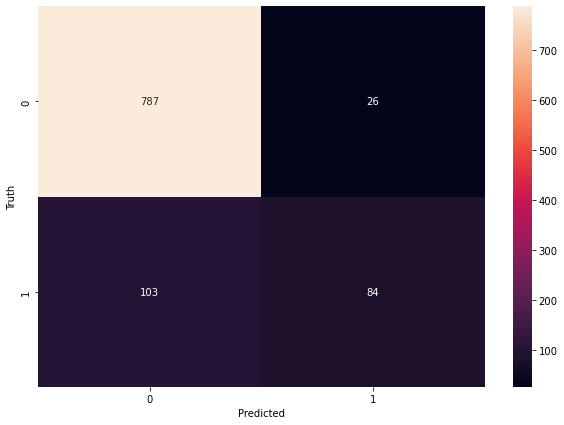

In [182]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
